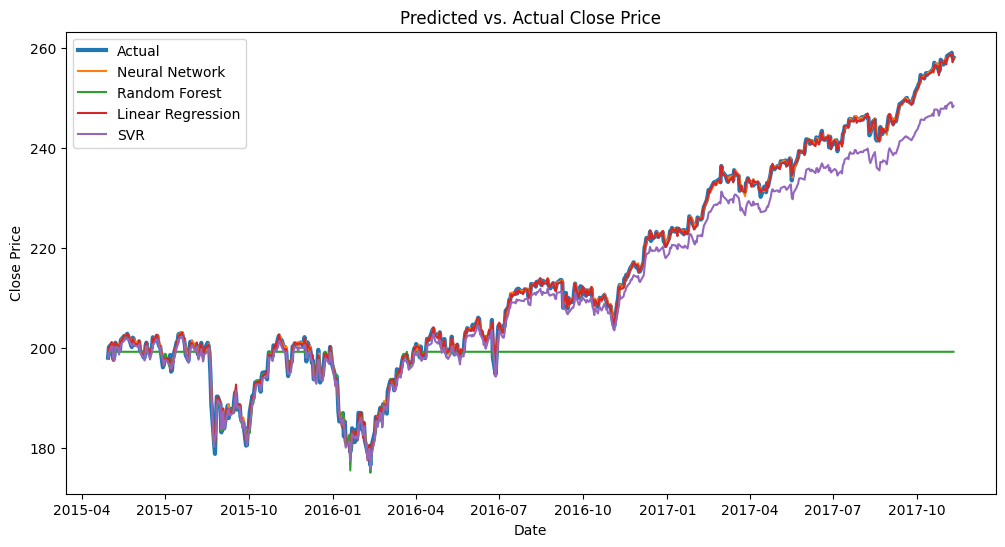

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.arima_model import ARIMA

# Assuming your data is in a CSV file named 'stock_data.csv'
df = pd.read_csv('../../data/stock-market/ETFs/spy.us.txt', index_col='Date', parse_dates=True)

# Preprocess the data
# Convert date to numerical representation for neural networks and SVR
df['Date_num'] = (df.index - df.index.min()).days  # Convert dates to the number of days since the first date

# Split data into features (X) and target variable (y)
X = df[['Open', 'High', 'Low', 'Volume', 'OpenInt', 'Date_num']]
y = df['Close']

# Perform a temporal split (training on past data, testing on future data)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the data for neural networks and SVR
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
model_nn.fit(X_train_scaled, y_train)
y_pred_nn = model_nn.predict(X_test_scaled)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# # Additive Model (ARIMA)
# model_arima = ARIMA(y_train, order=(1, 1, 1))
stl = STL(X_train['Close'], seasonal=13, period = 252)
res = stl.fit()
train_seasonal, train_trend = res.seasonal, res.trend
stl_test = STL(X_test['Close'], seasonal=13, period = 252)
res_test = stl_test.fit()
test_seasonal, test_trend = res_test.seasonal, res_test.trend
additive_predictions = test_trend + test_seasonal

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# SVR
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model_svr.fit(X_train_scaled, y_train)
y_pred_svr = model_svr.predict(X_test_scaled)

# Plot the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=3)  # Make the actual values thicker
plt.plot(y_test.index, y_pred_nn, label='Neural Network')
plt.plot(y_test.index, y_pred_rf, label='Random Forest')
# plt.plot(y_test.index, y_pred_arima, label='Additive Model (ARIMA)')
plt.plot(y_test.index, y_pred_lr, label='Linear Regression')
plt.plot(y_test.index, y_pred_svr, label='SVR')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predicted vs. Actual Close Price')
plt.show()
